In [1]:
import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt
import os

from pathlib import Path

In [2]:
DATASET_DIR = "../datasets/extracted_dataset/"
DS_IMAGES = DATASET_DIR + "images/"
DS_MASKS = DATASET_DIR + "masks/"

In [3]:
os.listdir(DS_IMAGES)[3000]

'61_199.bmp'

In [4]:
shapes = set()

In [5]:
WIDTH = 0
HEIGHT = 0

In [6]:
widths = []
heights = []
means = []
minimum, maximum = np.inf, 0

for p in Path(DS_IMAGES).glob("*"):
    img = cv2.imread(str(p), cv2.IMREAD_GRAYSCALE)
    minimum = min(minimum, img.min())
    maximum = max(maximum, img.max())

    means.append(np.mean(img))
    widths.append(img.shape[1])
    heights.append(img.shape[0])

KeyboardInterrupt: 

In [11]:
f"mean width: {np.mean(widths)}, mean height: {np.mean(heights)}, mean value: {np.mean(means)}."

'mean width: 925.2768123138034, mean height: 1226.6124627606753, mean value: 243.57914827165786.'

In [12]:
minimum, maximum

(0, 255)

In [7]:
samples = Path(DS_IMAGES).glob("*")

In [8]:
def imshow(image, fac=50):
    fig = plt.figure(figsize=(image.shape[0]/fac, image.shape[1]/fac))
    ax = fig.add_subplot()
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])

def anshow(image, mask, fac=10):
    fig, ax = plt.subplots(1, 2, figsize=(image.shape[0]/fac, image.shape[1]/fac))
    ax[0].imshow(image, cmap="gray")
    ax[0].set_xticks([])
    ax[0].set_yticks([])

    ax[1].imshow(mask, cmap="gray")
    ax[1].set_xticks([])
    ax[1].set_yticks([])

In [9]:
def read_sample():
    img_path = next(samples)
    base_name = os.path.splitext(img_path.name)[0]
    print("Image: ", img_path)
    ext = img_path.suffix
    img = cv2.imread(os.path.join(DS_IMAGES, base_name + ext), cv2.IMREAD_GRAYSCALE)
    print(img.shape)
    if os.path.exists(os.path.join(DS_MASKS, base_name + "_mask" + ext)):
        mask = cv2.imread(os.path.join(DS_MASKS, base_name + "_mask" + ext), cv2.IMREAD_GRAYSCALE)
    else:
        mask = np.zeros((10, 10))
    img = cv2.resize(img, (500, 500), interpolation=cv2.INTER_AREA)
    mask = cv2.resize(mask, (500, 500), interpolation=cv2.INTER_AREA)

    anshow(img, mask)

Image:  ../datasets/extracted_dataset/images/10.1.1.1.2112_9.bmp
(1056, 816)


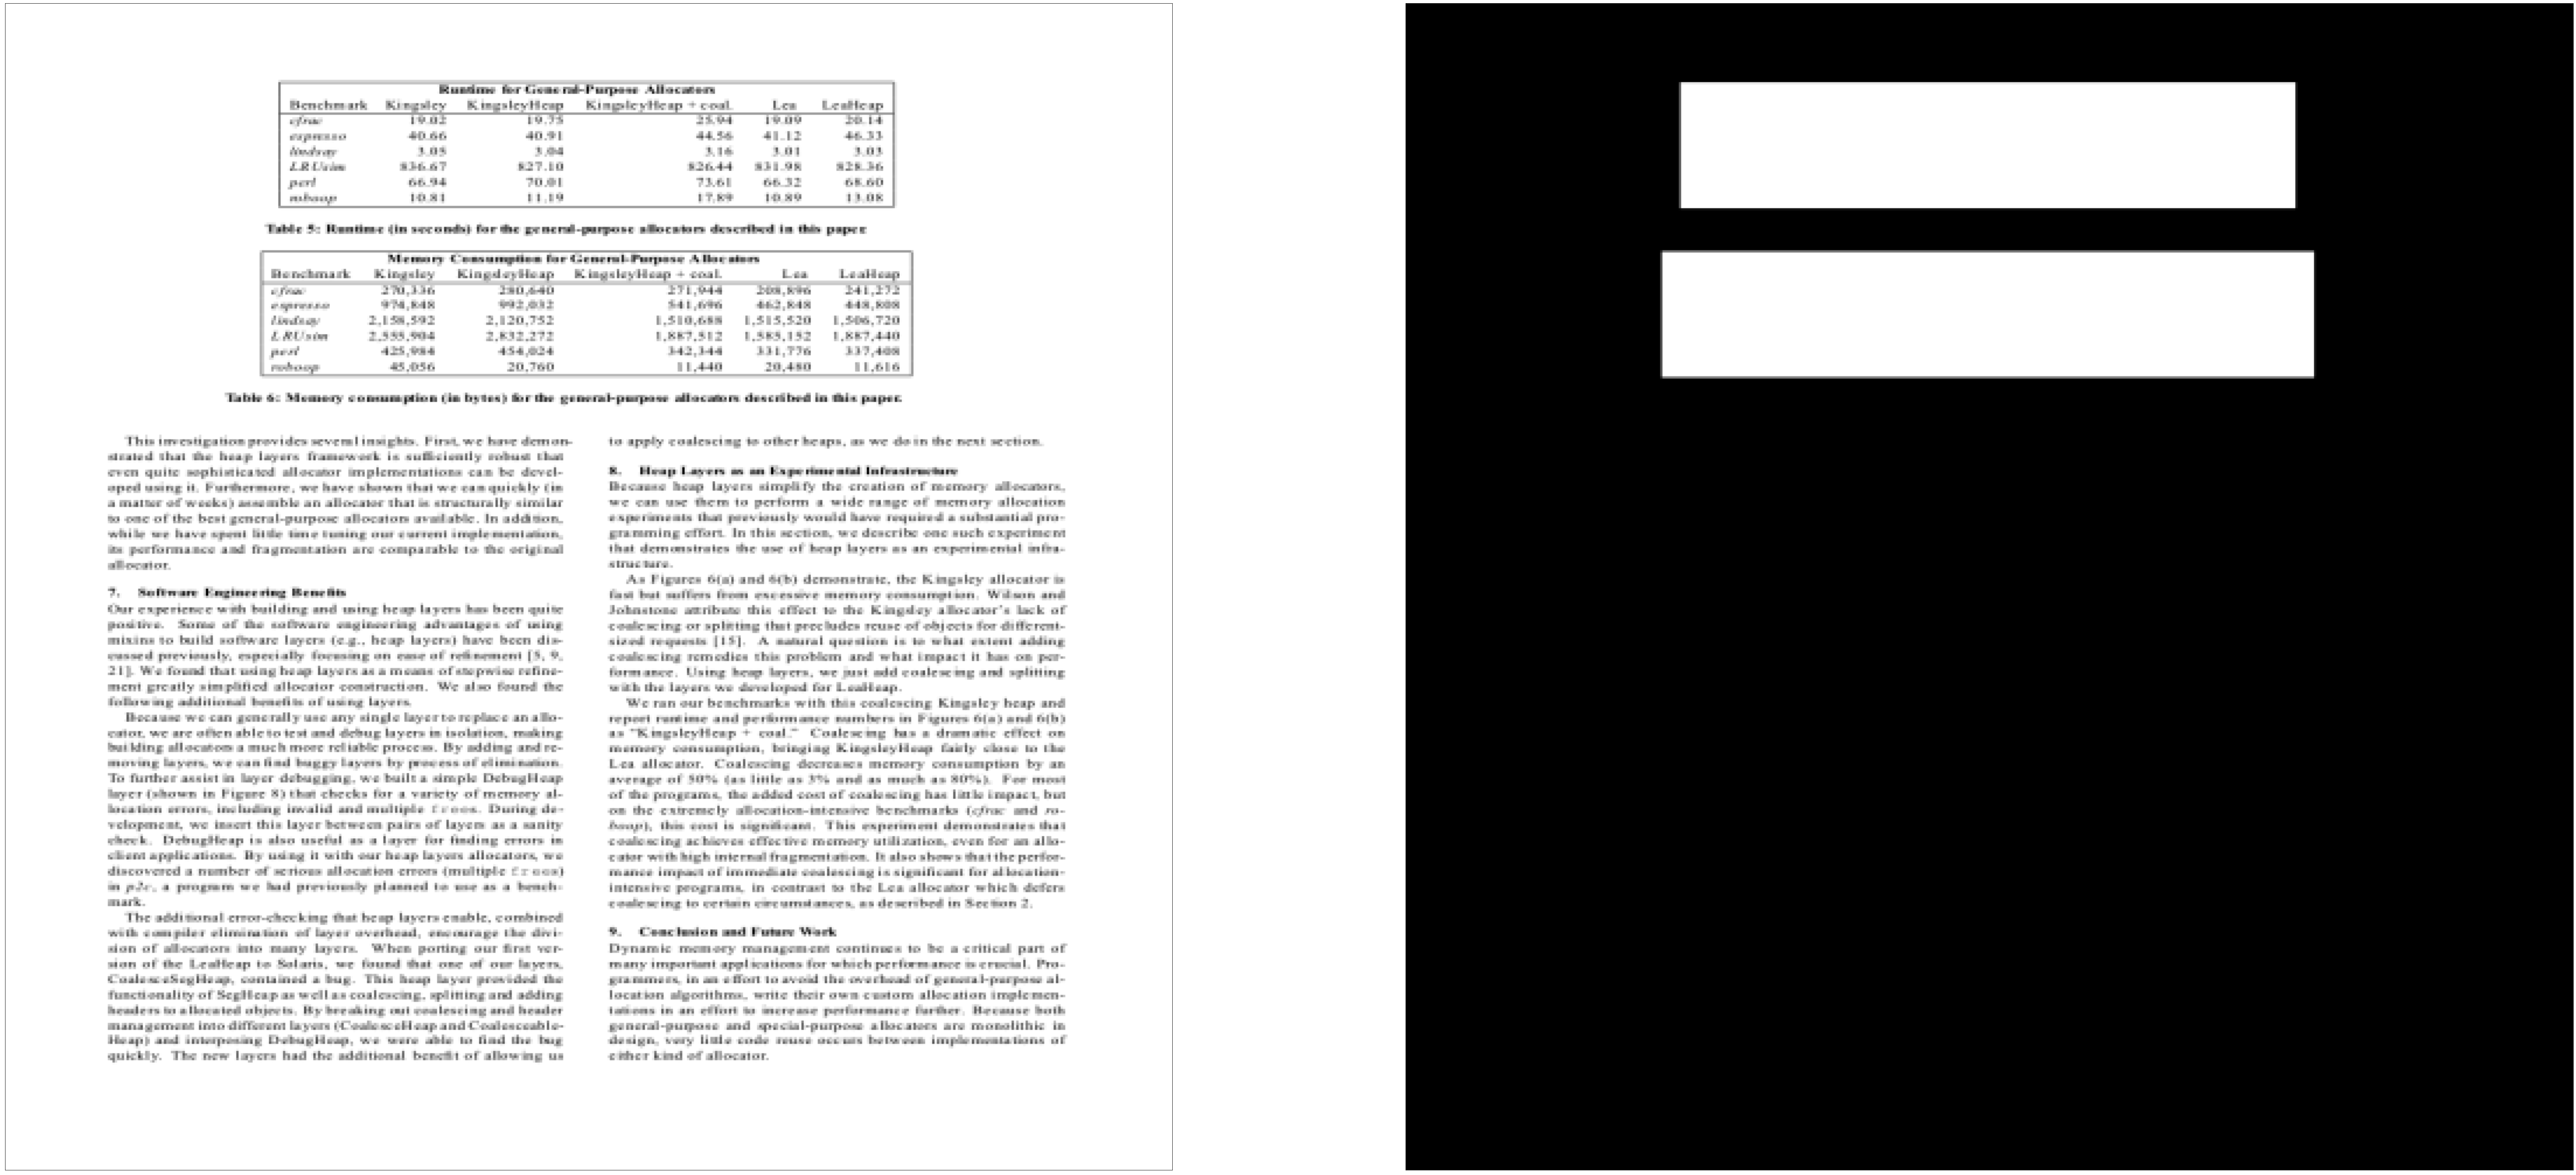

In [10]:
read_sample()